# Practica 09
## Jesús Emmanuel Arroyo Rangel
## Mtrícula: 220547
## 9-B
## IDGS
### Le gustan los tacos de pastor

## IMPORTACION DE LIBRERIAS

In [7]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns  
import warnings
warnings.filterwarnings("ignore")

## CARGAR EL DATASET

In [8]:
netflix_dataset=pd.read_csv("netflix_dataset.csv")
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [9]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7281 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [10]:
# Contar valores únicos
dict = {}
for i in list(netflix_dataset.columns):
    dict[i] = netflix_dataset[i].value_counts().shape[0]
    
print(pd.DataFrame(dict, index=["unique count"]).transpose())

# Verificar valores faltantes en el dataset
print('Table of missing values: ')
print(netflix_dataset.isnull().sum())

              unique count
show_id               7787
type                     2
title                 7787
director              4049
cast                  6831
country                681
date_added            1565
release_year            73
rating                  14
duration               216
listed_in              492
description           7769
Table of missing values: 
show_id            0
type               0
title              0
director        2389
cast             718
country          506
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [11]:
#missing value
print('Table of missing value: ')
print(netflix_dataset.isnull().sum())

Table of missing value: 
show_id            0
type               0
title              0
director        2389
cast             718
country          506
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


## Analisis de datos exploratorio

Text(0.5, 1.0, 'TV Shows VS Movies')

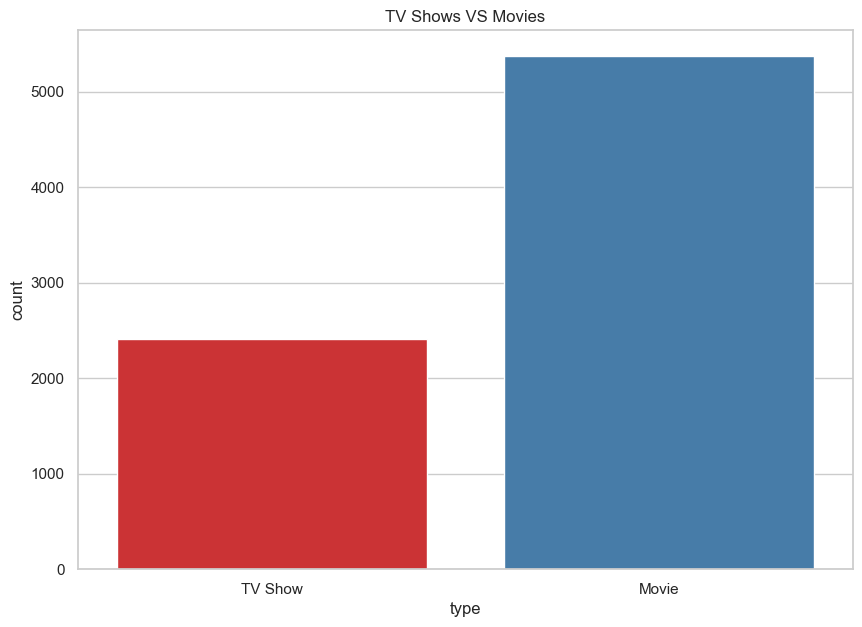

In [12]:
#Filtrar programas y peliculas
netflix_shows=netflix_dataset[netflix_dataset['type']=='TV Show']
netflix_movies=netflix_dataset[netflix_dataset['type']=='Movie']

plt.figure(figsize=(10,7))#Define tamaño de la figura
sns.set(style="whitegrid")#Estilo grafico
ax = sns.countplot(x="type", data=netflix_dataset, palette="Set1")#Conteo de tipos
ax.set_title("TV Shows VS Movies")#titulo del grafico

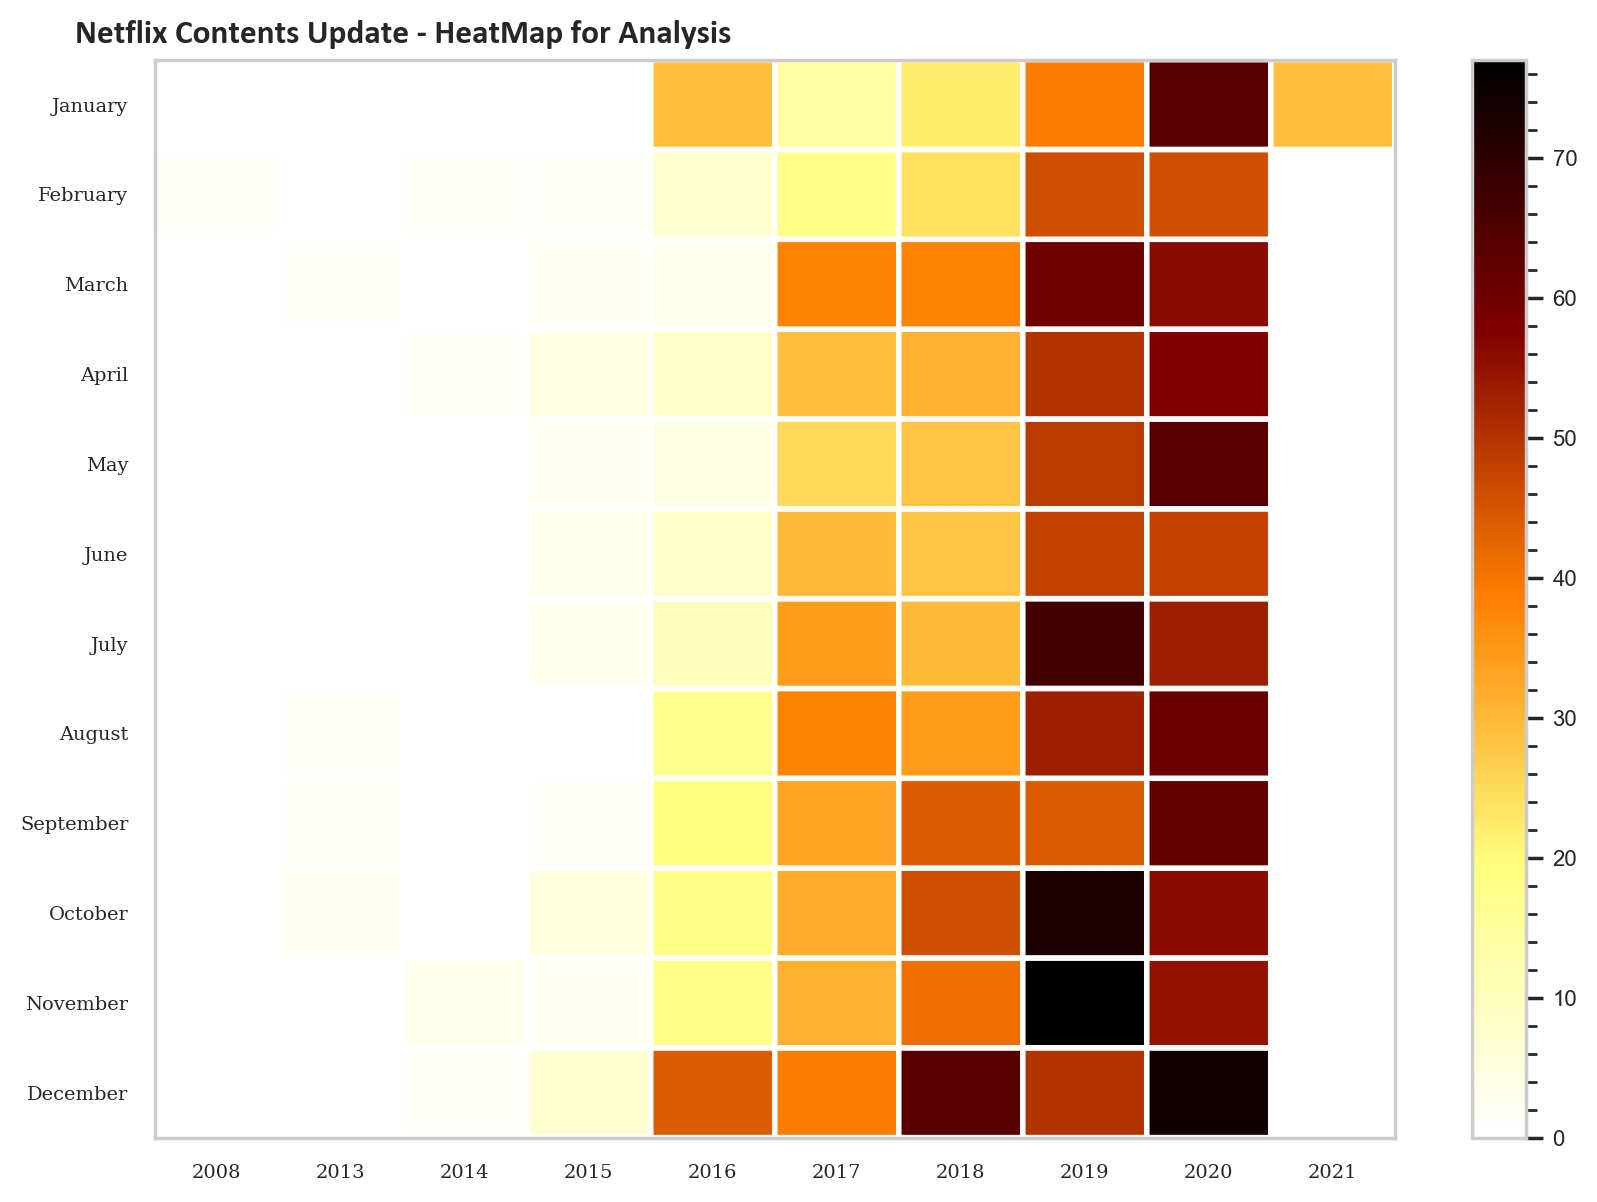

In [13]:
#¿En qué mes un productor puede publicar su contenido? 
#Mes con menor contenido añadido

netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update - HeatMap for Analysis', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

## Analisis de clasificaciones de peliculas

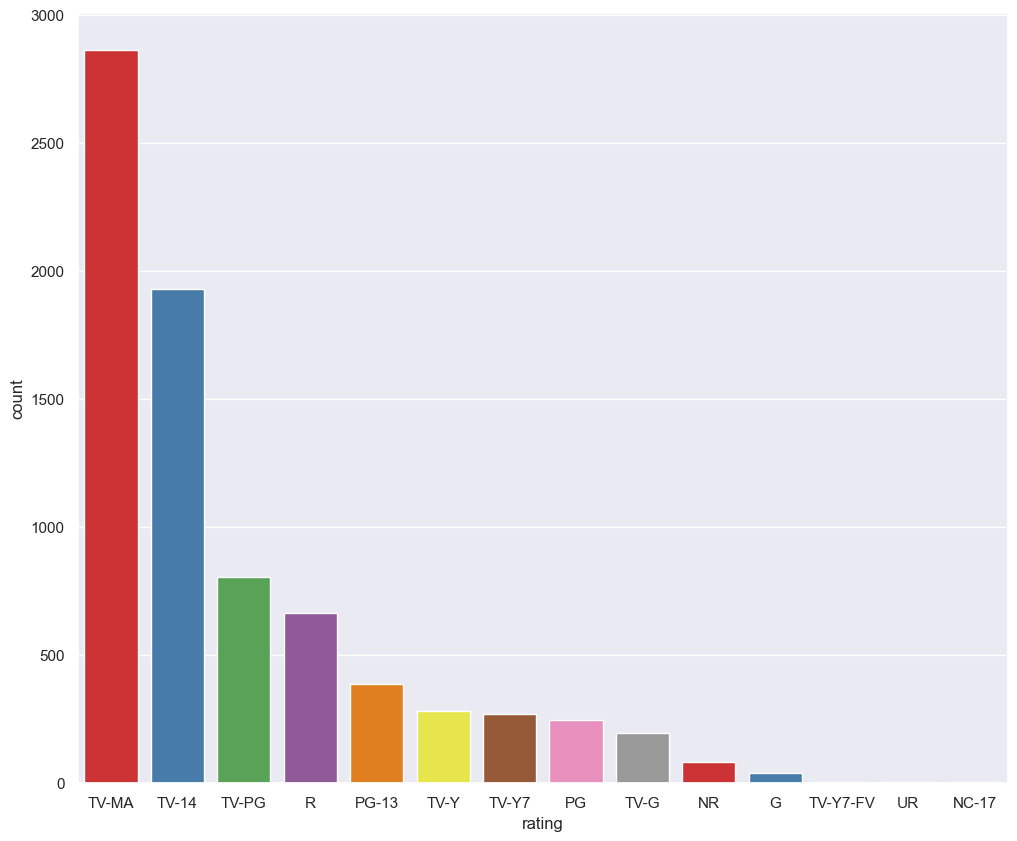

In [12]:
#Movie ratings analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_dataset, palette="Set1", order=netflix_dataset['rating'].value_counts().index[0:15])

## Análisis de las calificaciones de IMDB para obtener las películas mejor valoradas en Netflix

In [35]:
# Cargar datos de IMDB
imdb_ratings = pd.read_csv('IMDb ratings.csv', 
                          usecols=['weighted_average_vote', 'imdb_title_id']) 
imdb_titles = pd.read_csv('IMDb movies.csv', 
                         usecols=['title', 'year', 'genre', 'imdb_title_id']) 

#Datasets de IMDB usando el ID como clave
imdb_merged = pd.merge(imdb_titles, imdb_ratings, on='imdb_title_id', how='inner')

# Crear DataFrame limpio y sin duplicados
ratings = imdb_merged[['title', 'year', 'genre', 'weighted_average_vote']].copy()
ratings.columns = ['Title', 'Release Year', 'Genre', 'Rating']  # Renombrar columnas

# Eliminar duplicados (considerando mismo título, año y rating)
ratings.drop_duplicates(subset=['Title', 'Release Year', 'Rating'], inplace=True)

# Limpiar valores nulos
ratings.dropna(inplace=True)

# Verificación
print(f"Dataset shape: {ratings.shape}")
print("\nPrimeras filas del dataset:")
print(ratings.head())

# Si quieres guardar este nuevo dataset
ratings.to_csv('imdb_title_ratings.csv', index=False)

# --- ANÁLISIS CON NETFLIX ---#
try:
    netflix_dataset = pd.read_csv('netflix_titles.csv')  # Ajusta el nombre según tu archivo
    
    joint_data = ratings.merge(netflix_dataset, left_on='Title', right_on='title', how='inner')
    joint_data = joint_data.sort_values(by='Rating', ascending=False)
    
    # Visualizar top 10
    top_rated = joint_data.head(10)
    fig = px.sunburst(
        top_rated,
        path=['title', 'country'],
        values='Rating',
        color='Rating',
        title='Top 10 películas/series mejor valoradas en IMDB disponibles en Netflix'
    )
    fig.show()
    
    # Análisis de países
    country_count = joint_data['country'].value_counts().sort_values(ascending=False)
    top_countries = country_count.head(10)
    print("\nTop países creadores de contenido en Netflix según IMDB:")
    print(top_countries)
    
except FileNotFoundError:
    print("\nDataset de Netflix no encontrado. Se omitirá esa parte del análisis.")

Dataset shape: (85852, 4)

Primeras filas del dataset:
                         Title Release Year                      Genre  Rating
0                   Miss Jerry         1894                    Romance     5.9
1  The Story of the Kelly Gang         1906    Biography, Crime, Drama     6.1
2               Den sorte drøm         1911                      Drama     5.8
3                    Cleopatra         1912             Drama, History     5.2
4                    L'Inferno         1911  Adventure, Drama, Fantasy     7.0

Dataset de Netflix no encontrado. Se omitirá esa parte del análisis.


## Las 10 películas mejor valoradas en Netflix

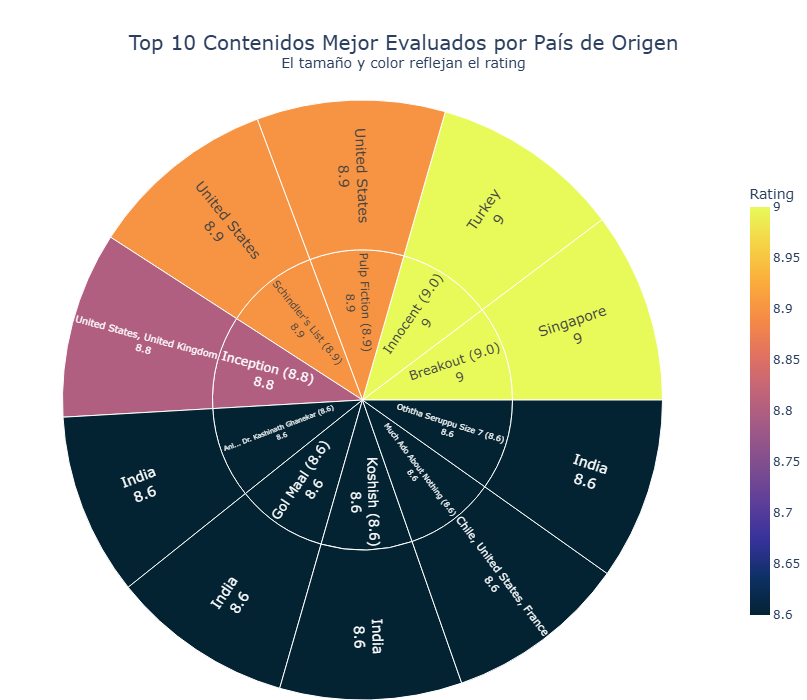

In [40]:
import plotly.express as px

# Verificar si tenemos datos de países
if 'joint_data' in locals():
    # Ordenar y seleccionar top 10
    top_rated = joint_data.sort_values(by='Rating', ascending=False).head(10).copy()
    
    # Crear etiquetas personalizadas que incluyan el rating
    top_rated['Label'] = top_rated['Title'] + ' (' + top_rated['Rating'].round(1).astype(str) + ')'
    
    # Crear el sunburst con mayor integración del rating
    fig = px.sunburst(
        top_rated,
        path=['Label', 'country'],  # Usamos las etiquetas personalizadas
        values='Rating',
        color='Rating',
        color_continuous_scale='thermal',  # Escala de colores más vibrante
        title='Top 10 Contenidos Mejor Evaluados por País de Origen<br><sup>El tamaño y color reflejan el rating</sup>',
        height=700,
        width=800
    )
    
    # Personalización avanzada
    fig.update_traces(
        textinfo="label+value",  # Muestra tanto la etiqueta como el valor
        insidetextorientation='radial',  # Mejor disposición del texto
        textfont_size=14,
        hovertemplate="<b>%{label}</b><br>Rating: %{value}<extra></extra>"
    )
    
    # Asegurarse de que no hay una variable llamada 'dict' que cause conflicto
    if 'dict' in globals():
        del dict  # Eliminar la variable conflictiva si existe
    
    fig.update_layout(
        margin=dict(t=100, l=0, r=0, b=0),  # Aquí dict es el tipo de dato
        title_x=0.5,
        title_font_size=20,
        coloraxis_colorbar=dict(
            title='Rating',
            thickness=20,
            len=0.75
        )
    )
    
    fig.show()
else:
    # Alternativa usando solo ratings (sin países)
    top_rated = ratings.sort_values(by='Rating', ascending=False).head(10).copy()
    top_rated['Label'] = top_rated['Title'] + ' (' + top_rated['Rating'].round(1).astype(str) + ')'
    
    fig = px.sunburst(
        top_rated,
        path=['Label', 'Genre'],
        values='Rating',
        color='Rating',
        title='Top 10 Contenidos Mejor Evaluados por Género'
    )
    fig.show()

## Principales países que crean contenidos

In [17]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,count
country,
United States,799
India,702
United Kingdom,107
Canada,56
Philippines,50
Spain,40
South Korea,36
Indonesia,35
France,33


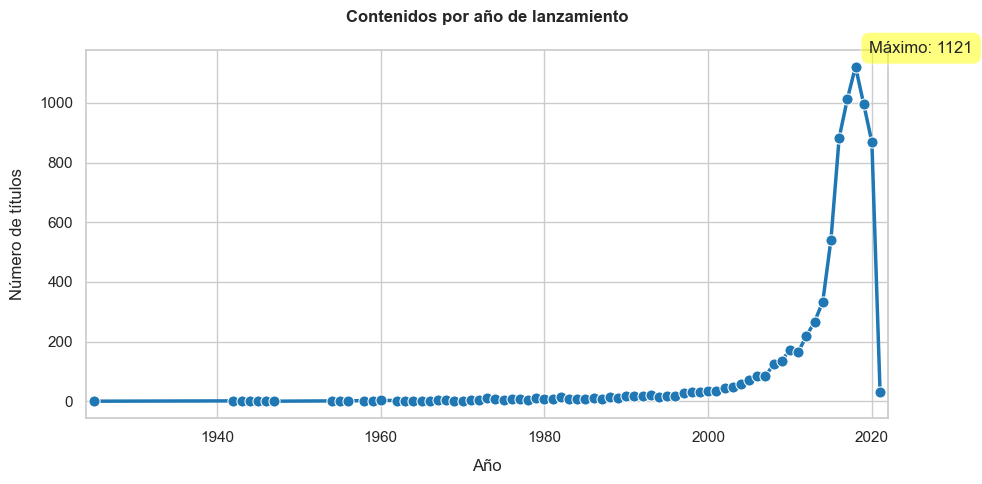

In [44]:
# Configuración inicial
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

# Datos básicos
conteo_anual = netflix_dataset['release_year'].value_counts().sort_index()

# Gráfico de línea
ax = sns.lineplot(
    x=conteo_anual.index,
    y=conteo_anual.values,
    color='#1f77b4',  # Azul estándar
    linewidth=2.5,
    marker='o',
    markersize=8
)

# Personalización
plt.title('Contenidos por año de lanzamiento', pad=20, fontweight='bold')
plt.xlabel('Año', labelpad=10)
plt.ylabel('Número de títulos', labelpad=10)

# Ajustar ejes
ax.set_xlim(conteo_anual.index.min()-1, conteo_anual.index.max()+1)

# Punto máximo
max_point = conteo_anual.idxmax()
ax.annotate(f'Máximo: {conteo_anual.max()}',
            xy=(max_point, conteo_anual.max()),
            xytext=(10, 10),
            textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

## Analísis de películas realizadas (países y tiempo de duración)

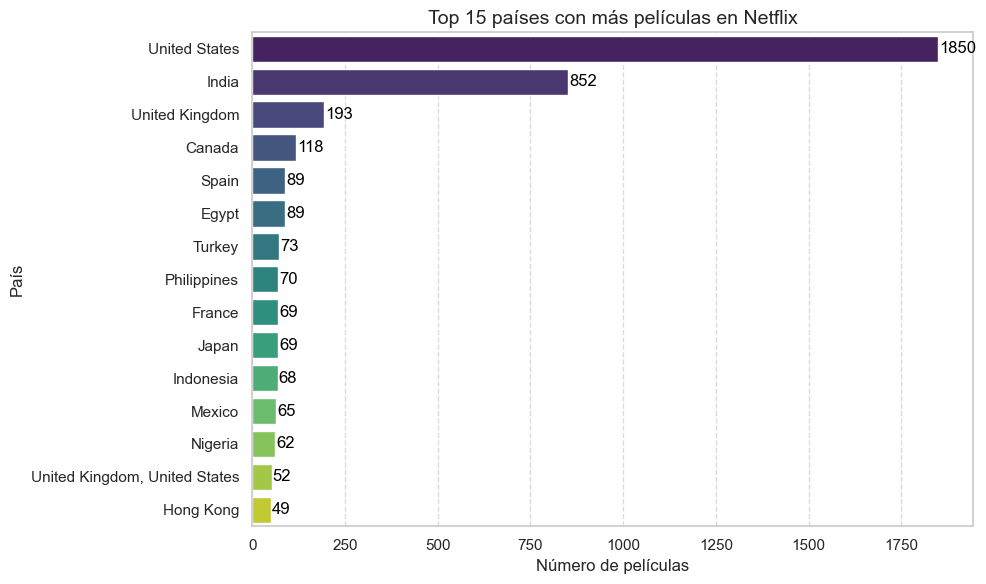

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo películas
peliculas = netflix_dataset[netflix_dataset['type'] == 'Movie']

# Conteo por país (top 15)
paises_count = peliculas['country'].value_counts().head(15)

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(
    y=paises_count.index,
    x=paises_count.values,
    palette='viridis',
    orient='h'
)

plt.title('Top 15 países con más películas en Netflix', fontsize=14)
plt.xlabel('Número de películas')
plt.ylabel('País')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor
for i, v in enumerate(paises_count.values):
    plt.text(v + 3, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

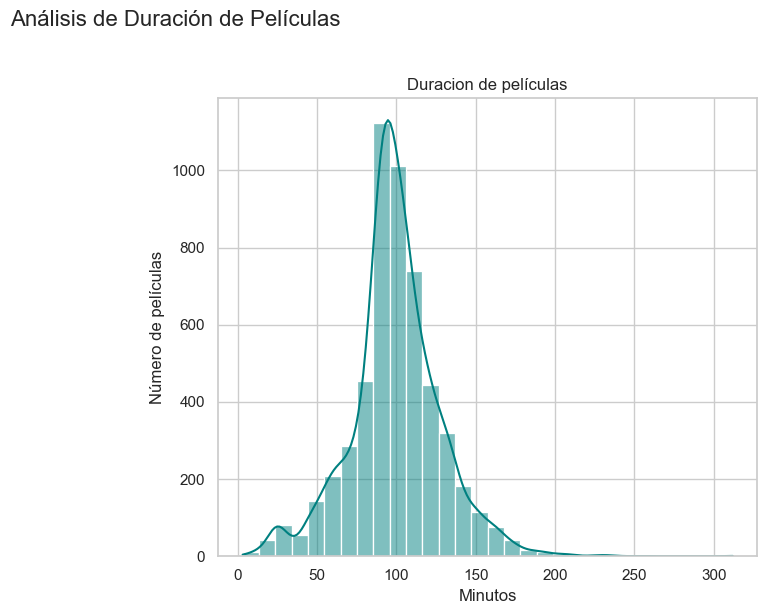

In [50]:
# Convertir duración a numérico
peliculas['duration_num'] = peliculas['duration'].str.extract('(\d+)').astype(float)

# Boxplot + Histograma combinado
plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 2)
sns.histplot(
    peliculas['duration_num'],
    bins=30,
    kde=True,
    color='teal'
)
plt.title('Duracion de películas')
plt.xlabel('Minutos')
plt.ylabel('Número de películas')

plt.suptitle('Análisis de Duración de Películas', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

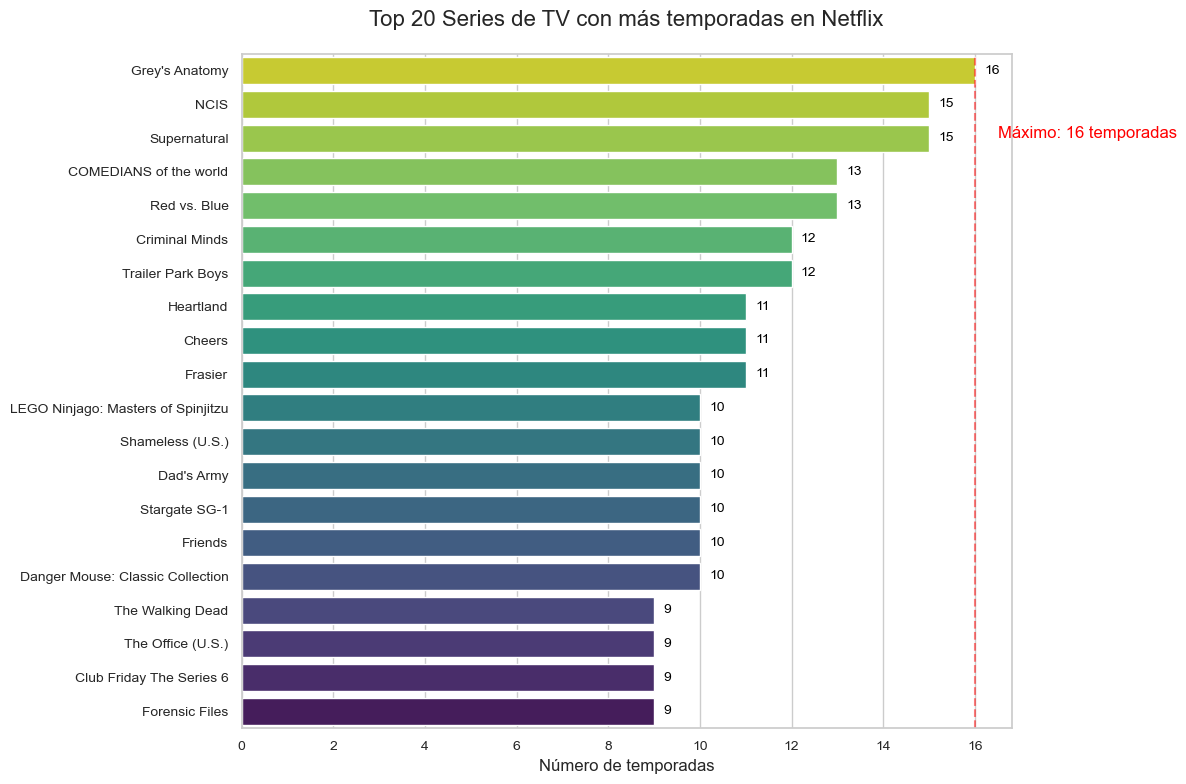

In [52]:
#Filtrar solo series de TV
series_tv = netflix_dataset[netflix_dataset['type'] == 'TV Show'].copy()

#Extraer número de temporadas y limpiar datos
series_tv['num_seasons'] = series_tv['duration'].str.extract('(\d+)').astype(float)

#Ordenar y seleccionar top 20
top_series = series_tv.sort_values('num_seasons', ascending=False).head(20)

#Configuración del gráfico
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax = sns.barplot(
    x='num_seasons',
    y='title',
    data=top_series,
    palette='viridis_r',
    orient='h'
)

#Gráfico
plt.title('Top 20 Series de TV con más temporadas en Netflix', fontsize=16, pad=20)
plt.xlabel('Número de temporadas', fontsize=12)
plt.ylabel('')  # Eliminamos etiqueta del eje Y
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#Etiquetas de valor
for i, v in enumerate(top_series['num_seasons']):
    ax.text(v + 0.2, i, f'{int(v)}', color='black', va='center', fontsize=10)

max_seasons = top_series['num_seasons'].max()
plt.axvline(x=max_seasons, color='red', linestyle='--', alpha=0.5)
plt.text(max_seasons + 0.5, 2, f'Máximo: {int(max_seasons)} temporadas', color='red')

plt.tight_layout()
plt.show()

# Construye un sistema de recomendación (Basado en Contenido)

In [4]:
# Librerías fundamentales
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords # La lista completa de stopwords para inglés incluye 179 palabras

# Descargar stopwords si es que no se tienen
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
#Limpieza básica de datos
netflix_dataset['description'] = netflix_dataset['description'].fillna('')

#Configuración del vectorizador TF-IDF
tfidf = TfidfVectorizer(
    stop_words=stopwords.words('english'),  # Elimina palabras vacías
    lowercase=True,        # Convierte a minúsculas
    ngram_range=(1, 2),   # Considera unigramas y bigramas
    max_features=5000     # Máximo número de features
)

#Creación de la matriz TF-IDF
tfidf_matrix = tfidf.fit_transform(netflix_dataset['description'])
print(f"Dimensiones de la matriz TF-IDF: {tfidf_matrix.shape}")

Dimensiones de la matriz TF-IDF: (7787, 5000)


In [15]:
###Cálculo de similitud
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

#Mapeo de índices a títulos
indices = pd.Series(netflix_dataset.index, index=netflix_dataset['title']).drop_duplicates()

#Función de recomendación
def get_recommendations(title, cosine_sim=cosine_sim, top_n=10):
    try:
        # Obtener índice del título
        idx = indices[title]
        
        # Obtener puntuaciones de similitud
        sim_scores = list(enumerate(cosine_sim[idx]))
        
        # Ordenar por puntuación
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        
        # Obtener los top más similares (excluyendo el propio título)
        sim_scores = sim_scores[1:top_n+1]
        
        # Obtener índices y puntuaciones
        movie_indices = [i[0] for i in sim_scores]
        scores = [i[1] for i in sim_scores]
        
        # Devolver recomendaciones
        recommendations = netflix_dataset[['title', 'type', 'description']].iloc[movie_indices]
        recommendations['similarity_score'] = np.round(scores, 3)
        
        return recommendations
    
    except KeyError:
        return f"El título '{title}' no se encuentra en el dataset."

 # Ejemplo de uso
get_recommendations("AK vs AK")

#Nota: dentro del dataset hay series que no se encuentran cómo "Game of thrones", "Grey's Anatomy", etc.

,title,type,description,similarity_score
2004,Enemy,Movie,When a humdrum academic spots his double in a ...,0.258
4366,My Week with Marilyn,Movie,"While filming a movie in England, Hollywood ic...",0.221
2577,"Hail, Caesar!",Movie,When a major star is kidnapped from a movie se...,0.204
6302,The Disaster Artist,Movie,Aspiring actor Greg moves to Los Angeles with ...,0.187
6279,The Death of Mr. Lazarescu,Movie,The plot of Romanian director Cristi Puiu's re...,0.182
926,Billu,Movie,An Indian village is abuzz with news that a ma...,0.179
5576,Shopkins: Wild,Movie,Beloved movie star Scarletta Gateau visits Sho...,0.171
310,Adel Karam: Live from Beirut,Movie,"From Casino du Liban, Lebanese actor and comed...",0.166
5065,Ragini MMS 2,Movie,The horror continues when Ragini's video goes ...,0.165
1114,Brother's Shadow,Movie,"After serving time in jail, a disgraced son re...",0.164
